# Projet

Le projet consiste à prévoir le nombre de vélos loués à chaque heure dans des bornes libres-services de la ville (système type Vélib'). La variable cible est ici la variable **count**.

Voici un descriptif de l'ensemble des variables :
* *datetime* - date et heure du relevé 
* *season* - 1 = printemps , 2 = été, 3 = automne, 4 = hiver 
* *holiday* – indique si le jour est un jour de vacances scolaires 
* *workingday* - indique si le jour est travaillé (ni week-end ni vacances) 
* *weather* - 1: Dégagé à nuageux, 2 : Brouillard, 3 : Légère pluie ou neige, 4 : Fortes averses ou neiges 
* *temp* – température en degrés Celsius 
* *atemp* – température ressentie en degrés Celsius 
* *humidity* – taux d’humidité 
* *windspeed* – vitesse du vent 
* *casual* - nombre de locations d’usagers non abonnés 
* *registered* – nombre de locations d’usagers abonnés 
* *count* – nombre total de locations de vélos 

L'objectif du projet est de mener à bien la création d'un modèle qui pourrait théoriquement être déployé en production. Les étapes d'exploration des données, de traitement et de preprocessing ne sont bien entendu pas à négliger. Il ne s'agit pas d'une compétition de type *Kaggle*, le projet ne sera pas uniquement noté sur la performance du modèle, mais plutôt sur votre approche complète et la justification de chacun de vos choix.

Comme vu durant le cours, soyez faites attention à certains points :
- quel type de problème dois-je traiter ?
- feature engineering : est-ce que j'utilise les données correctement, toutes les données ?
- data leakage : est-ce qu'une de mes features n'est pas trop explicative ?
- ai-je bien traité toutes les données correctement ?
- est-ce que mon modèle est adapté ?
- etc, etc, etc

Soyez vigilant à expliquer et justifier votre démarche à l'aide de visualisation, de commentaires dans vos codes (pensez aux cellules markdown), etc

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [141]:
df = pd.read_csv("velo.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [143]:
#Missing values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Il n'y a pas de valeurs manquantes

In [144]:
#Feature Engineering
df["Year"]=pd.Categorical(pd.DatetimeIndex(df["datetime"]).year)
df["Month"]=pd.Categorical(pd.DatetimeIndex(df["datetime"]).month)
df["Weekday"]=pd.Categorical(pd.DatetimeIndex(df["datetime"]).weekday)
df["Hour"]=pd.Categorical(pd.DatetimeIndex(df["datetime"]).hour)
df=df.drop(columns=["datetime","workingday","season"], axis=1)

In [145]:
#Conversion en variables catégorielles:
df["weather"]=pd.Categorical(df["weather"])
df["holiday"]=pd.Categorical(df["holiday"])

#On extrait de datetime les variables "year", "month", "weekday" (jour de la semaine de 0 à 6) et "hour". 
#On drop également workingday pour éviter la colinéarité avec Weekday et holiday. En effet: {holiday=1}=>workingday=0 et {holiday=0 & weekday>=5 cad weekend} =>workingday=0 ou 1 si en semaine
#De même, on drop season qui est redondant par rapport à Month

In [146]:
#Visualisation des Variables continues liées aux conditions météorologiques

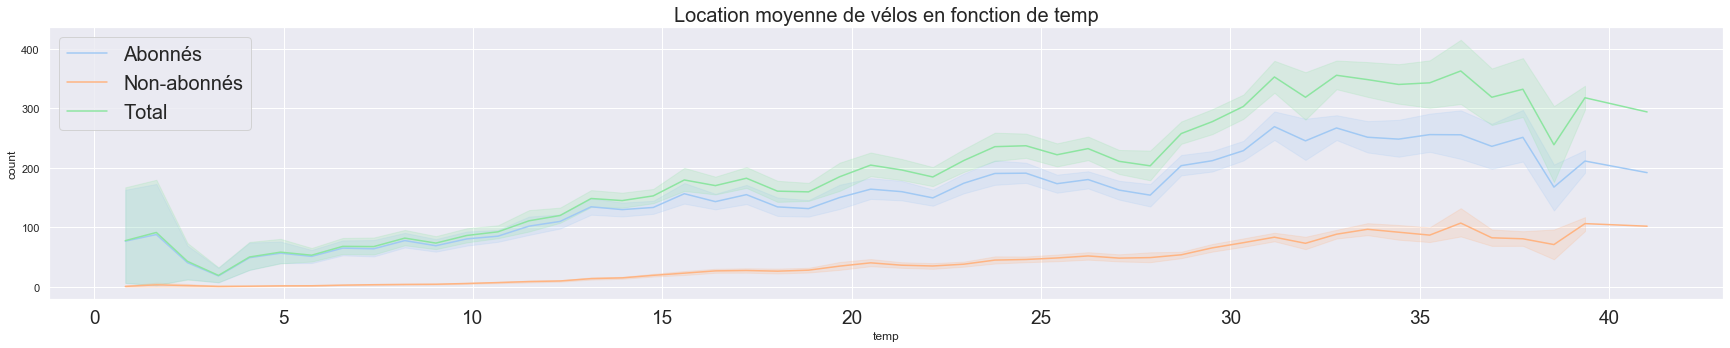

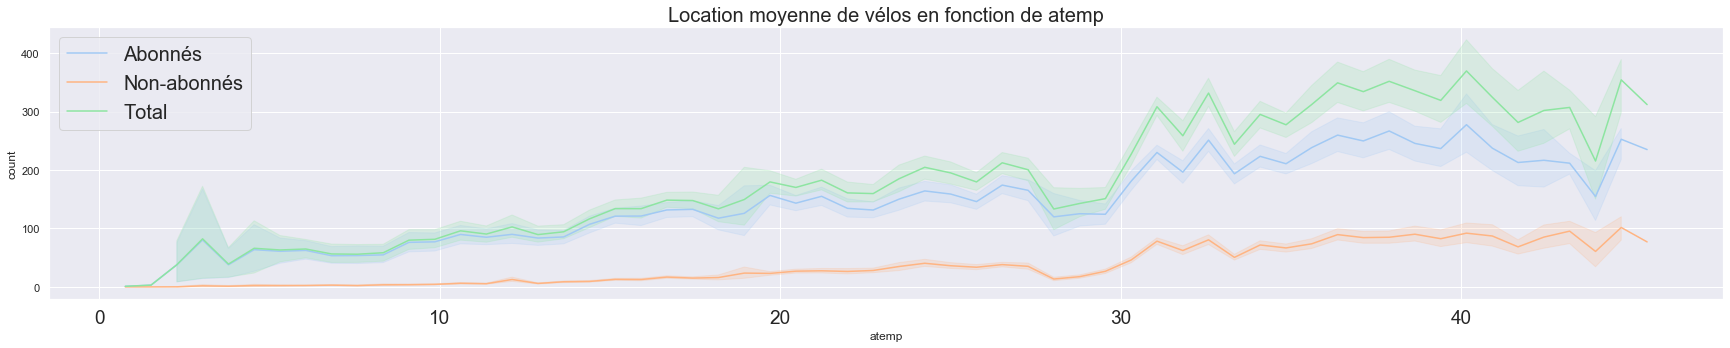

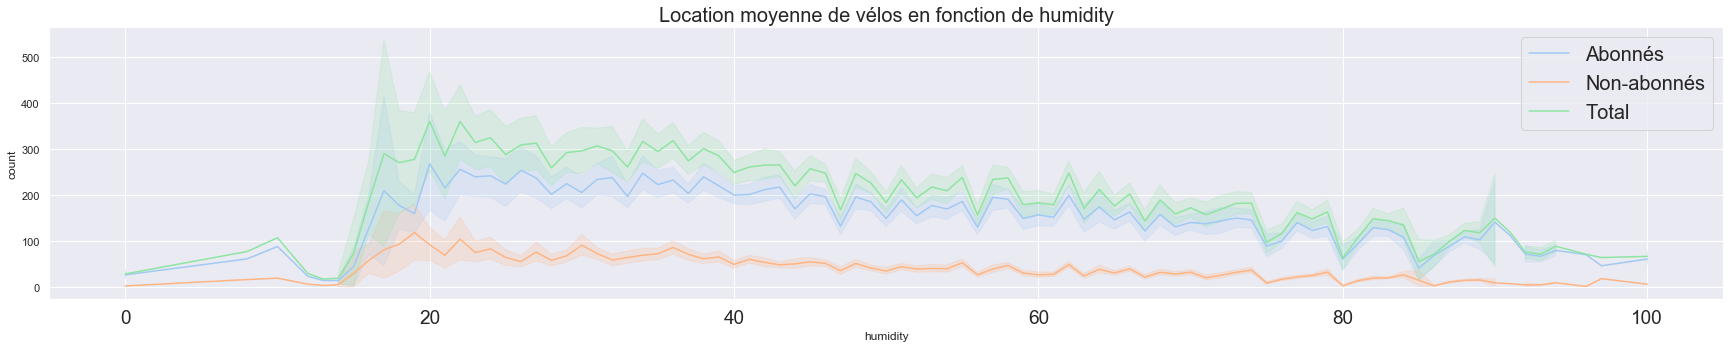

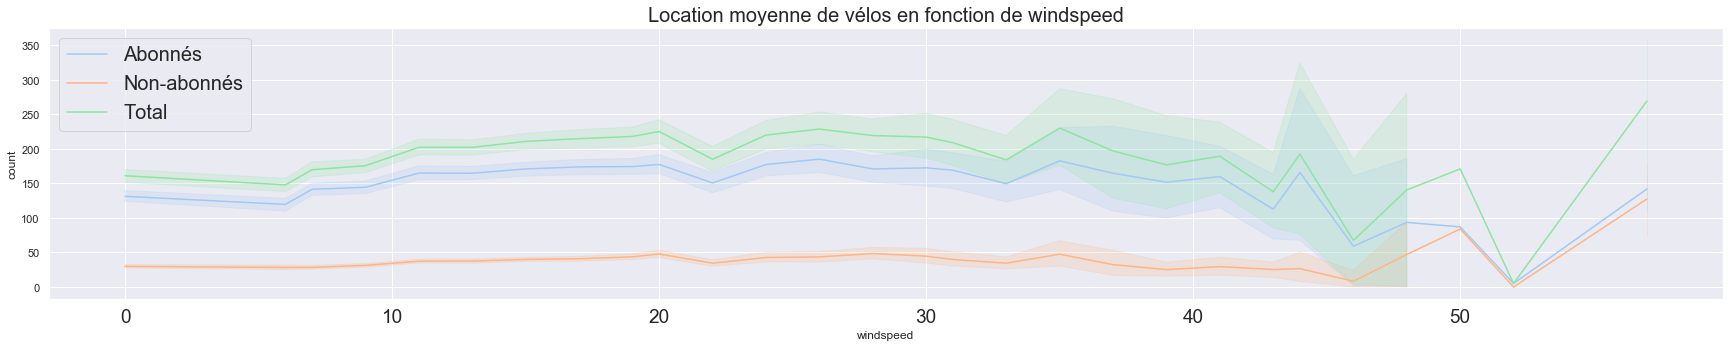

In [147]:
import seaborn as sns
def lineplot(data,feature):
    plt.figure(figsize=(30,5))
    chart=sns.set(palette="pastel")
    sns.lineplot(data[feature],data["registered"], estimator="mean", label="Abonnés")
    sns.lineplot(data[feature],data["casual"], estimator="mean", label="Non-abonnés")
    sns.lineplot(data[feature],data["count"], estimator="mean", label="Total")
    plt.xticks(rotation='0', fontsize=19)
    plt.legend(fontsize=20)
    plt.title("Location moyenne de vélos en fonction de "+feature,fontsize=20)
    plt.show()

lineplot(df,"temp")
lineplot(df,"atemp")
lineplot(df,"humidity")
lineplot(df,"windspeed")

In [148]:
df.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


#On observe que le nombre de location de vélos est corrélé positivement à respectivement 39% et 10% par rapport à la Température et Windspeed, et négativement à -31% par rapport à l'humidité.
#De plus, la variable atemp est corrélée à 98.5% à la variable temp (cf prochain scatterplot). Ainsi, nous droperons temp pour réduire le bruit dans les données.

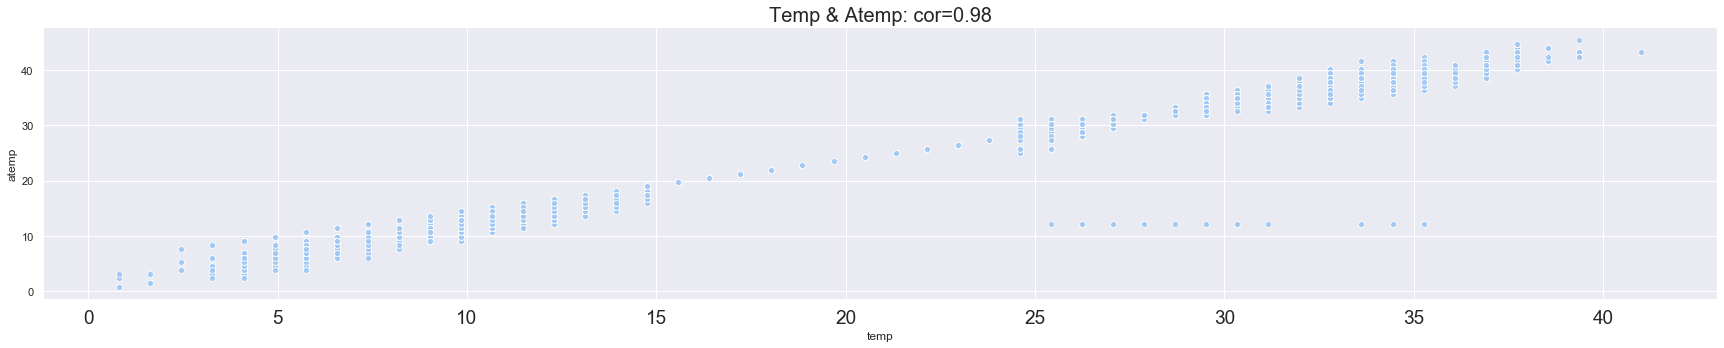

In [149]:
plt.figure(figsize=(30,5))
chart=sns.set(palette="pastel")
sns.scatterplot(df["temp"],df["atemp"])
plt.xticks(rotation='0', fontsize=19)
plt.title("Temp & Atemp: cor=0.98",fontsize=20)
plt.show()

In [150]:
df=df.drop("temp",axis=1)

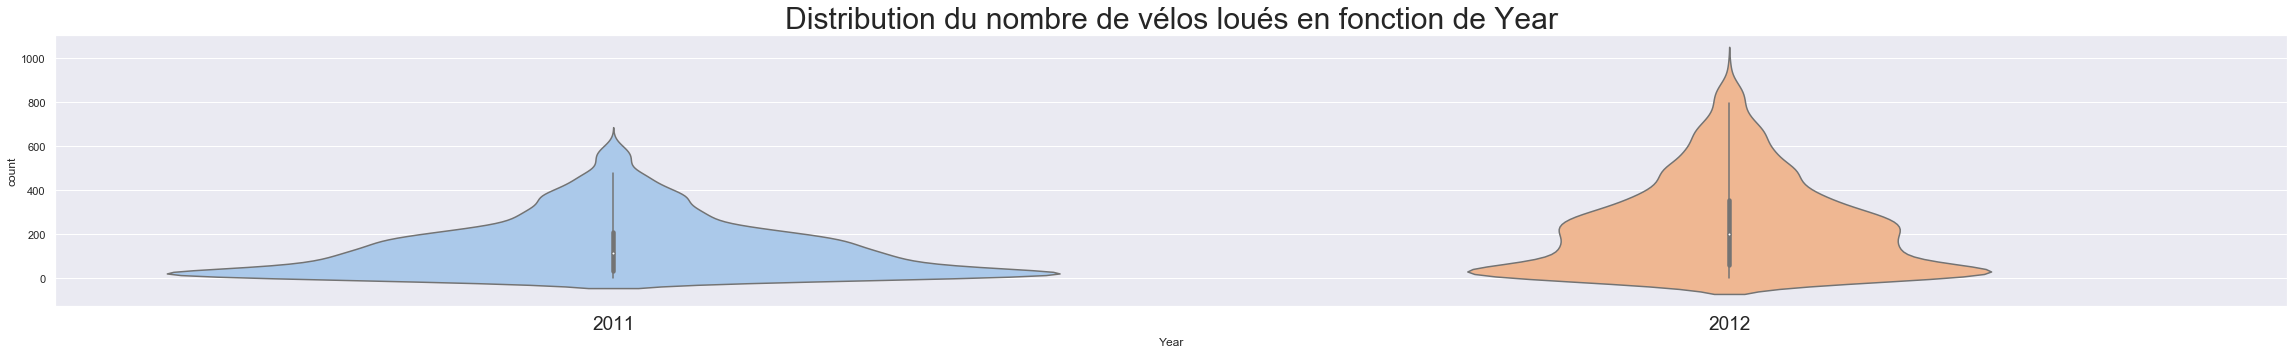

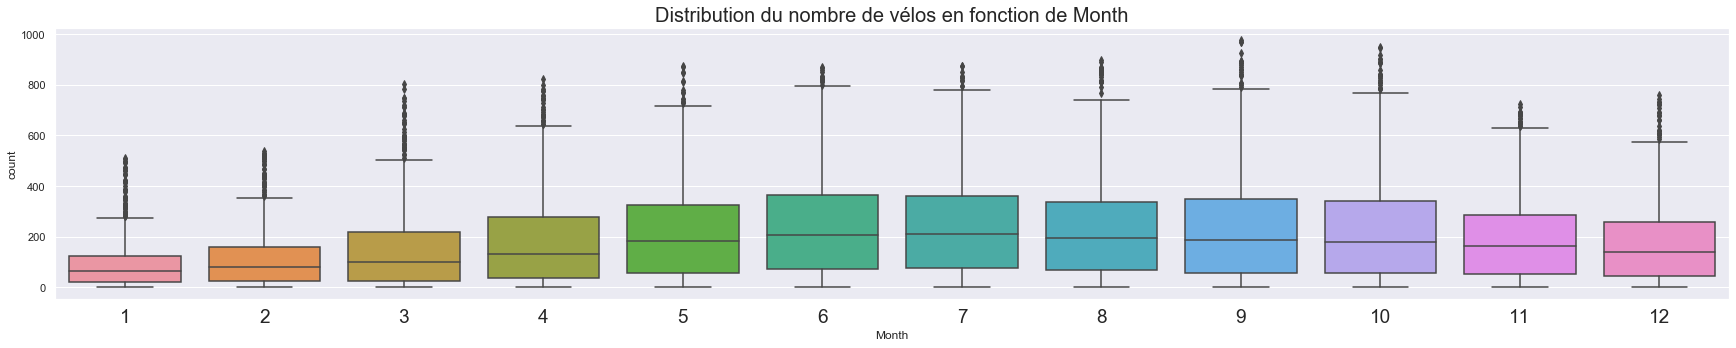

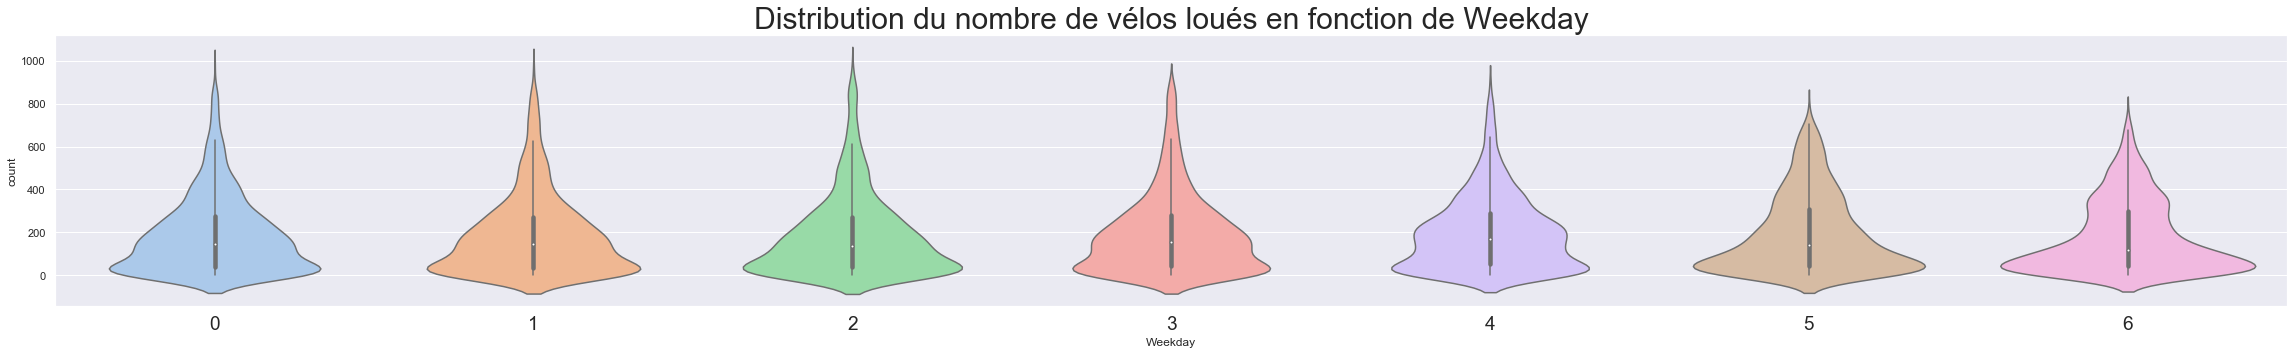

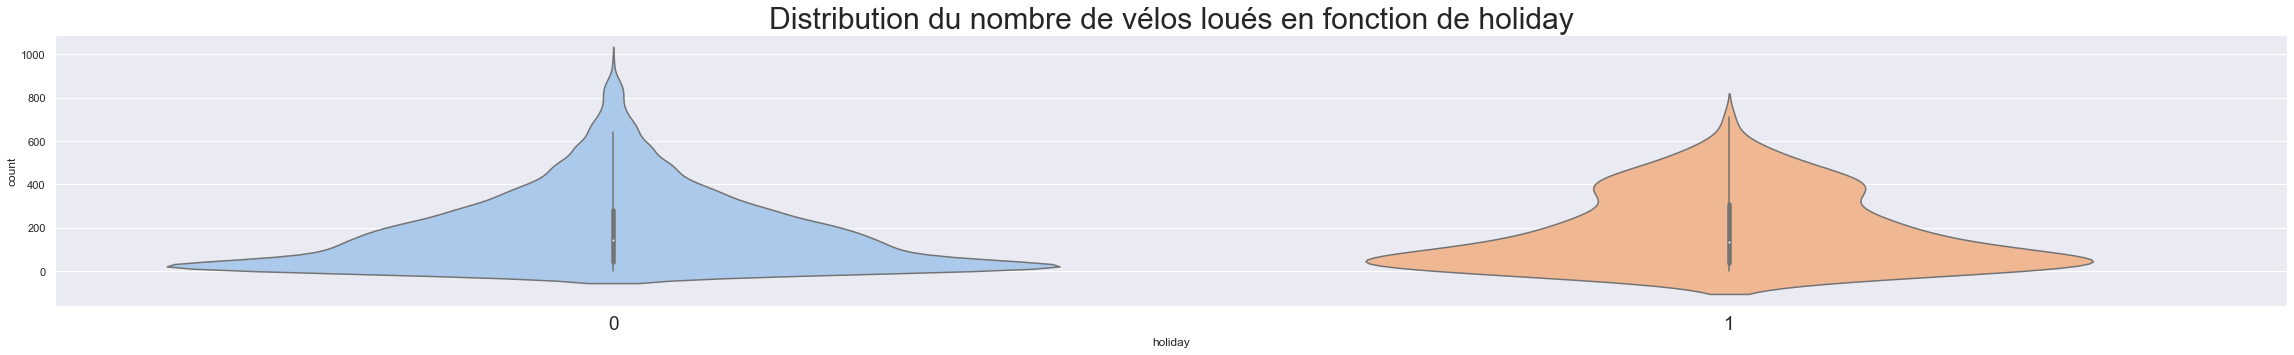

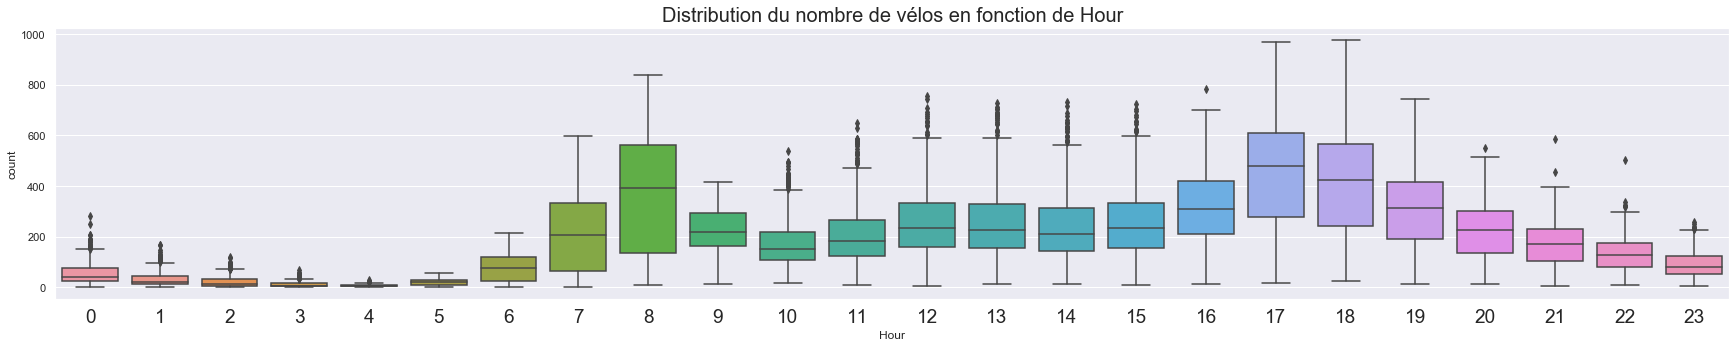

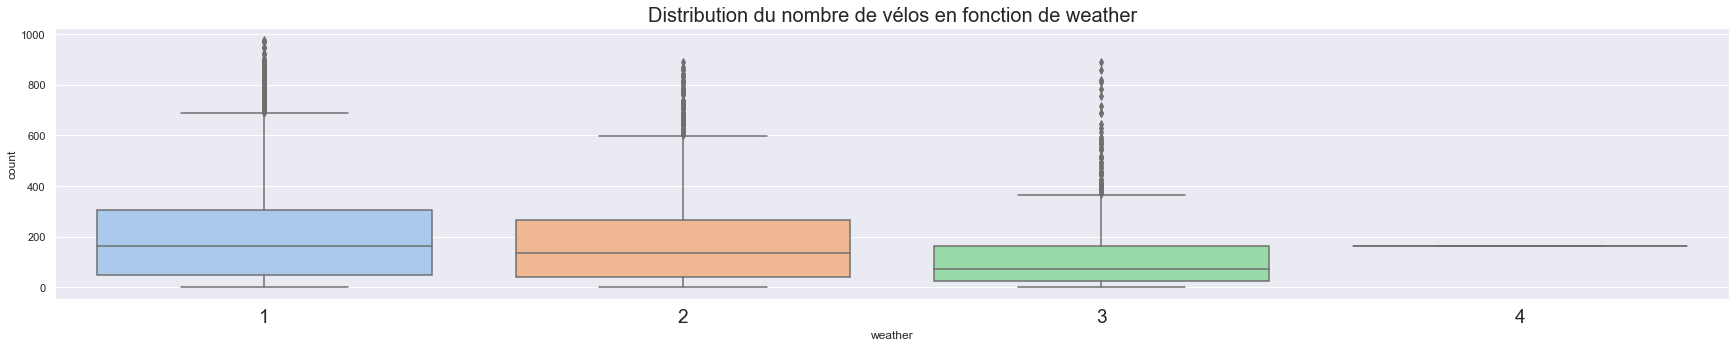

In [151]:
#Analyse statistique Bivariée
def boxplot(data,feature):
    plt.figure(figsize=(30,5))
    chart=sns.set(palette="pastel")
    sns.boxplot(data[feature],data["count"])
    plt.xticks(rotation='0', fontsize=19)
    plt.title("Distribution du nombre de vélos en fonction de "+feature,fontsize=20)
    plt.show()
    
def violinplot(data,feature):
    plt.figure(figsize=(40,5))
    chart=sns.set(palette="pastel")
    sns.violinplot(data[feature],data["count"])
    plt.xticks(rotation='0', fontsize=19)
    plt.title("Distribution du nombre de vélos loués en fonction de "+feature,fontsize=30)
    plt.show()
    
violinplot(df,"Year")
boxplot(df,"Month")
violinplot(df,"Weekday")
violinplot(df,"holiday")
boxplot(df,"Hour")
boxplot(df,"weather")

#On observe que toutes les variables catégorielles sont discriminantes. 
#C'est un peu moins évident pour weekday avec ce type de graphe, c'est pourquoi nous allons investiguer cette variable.

C:\Users\bigdata\DS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


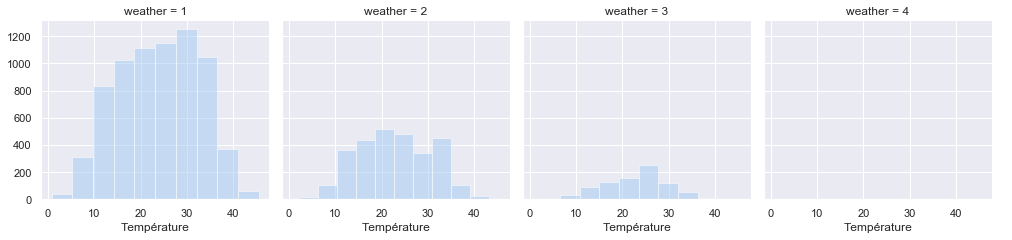

In [152]:
#Analyse de weather: Distribution de température en fonction de weather
grid = sns.FacetGrid(df, col='weather', size=3.5)
grid.map(plt.hist, 'atemp',alpha=.5).set_axis_labels("Température")
grid.add_legend()

#On constate que weather est bien corrélé aux données météos. On conservera néanmoins cette variable, car sans considérer les données de température, de vent et d'humidité, l'aspect du ciel est intuitivement un facteur de décision important dans la location d'un vélo.
#La catégorie 4 de weather est inexistante. Nous droperons une colonne de plus lors de la dummifycation.

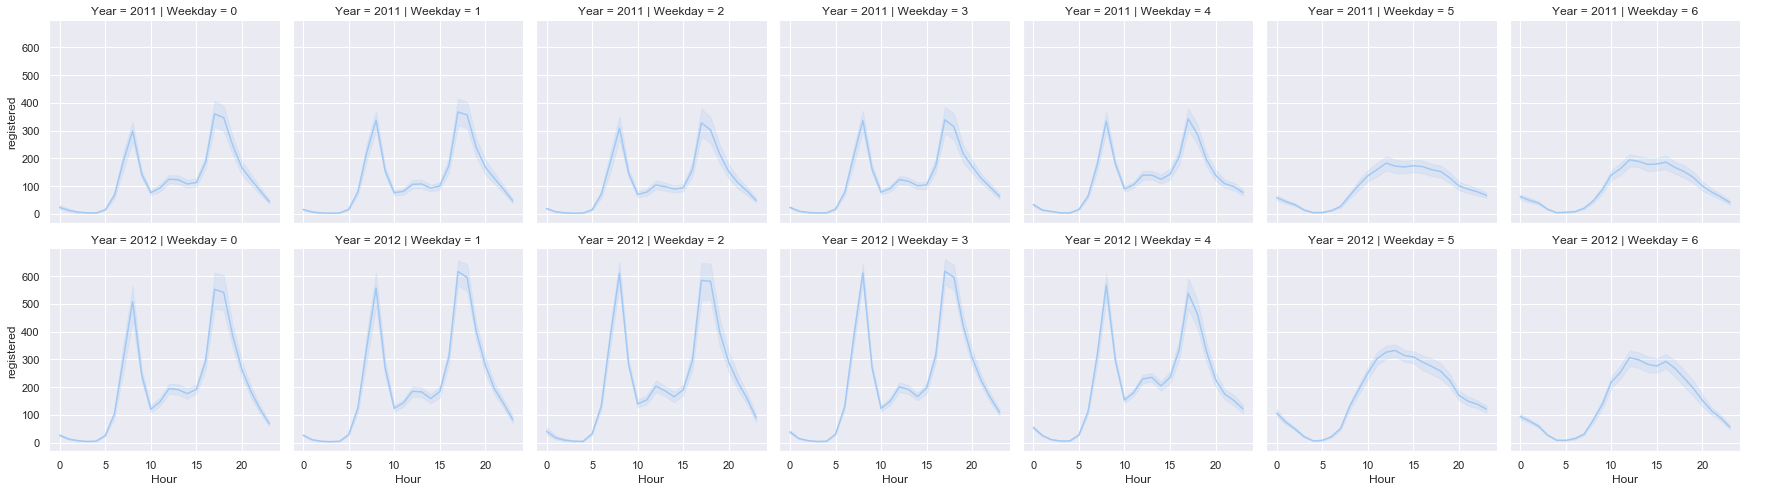

In [153]:
#Analyse des tendances journalières de la location de vélos par des abonnés et évolution entre 2011 et 2012
grid = sns.FacetGrid(df, col='Weekday',row='Year', size=3.5)
grid.map(sns.lineplot, 'Hour','registered')
grid.add_legend()

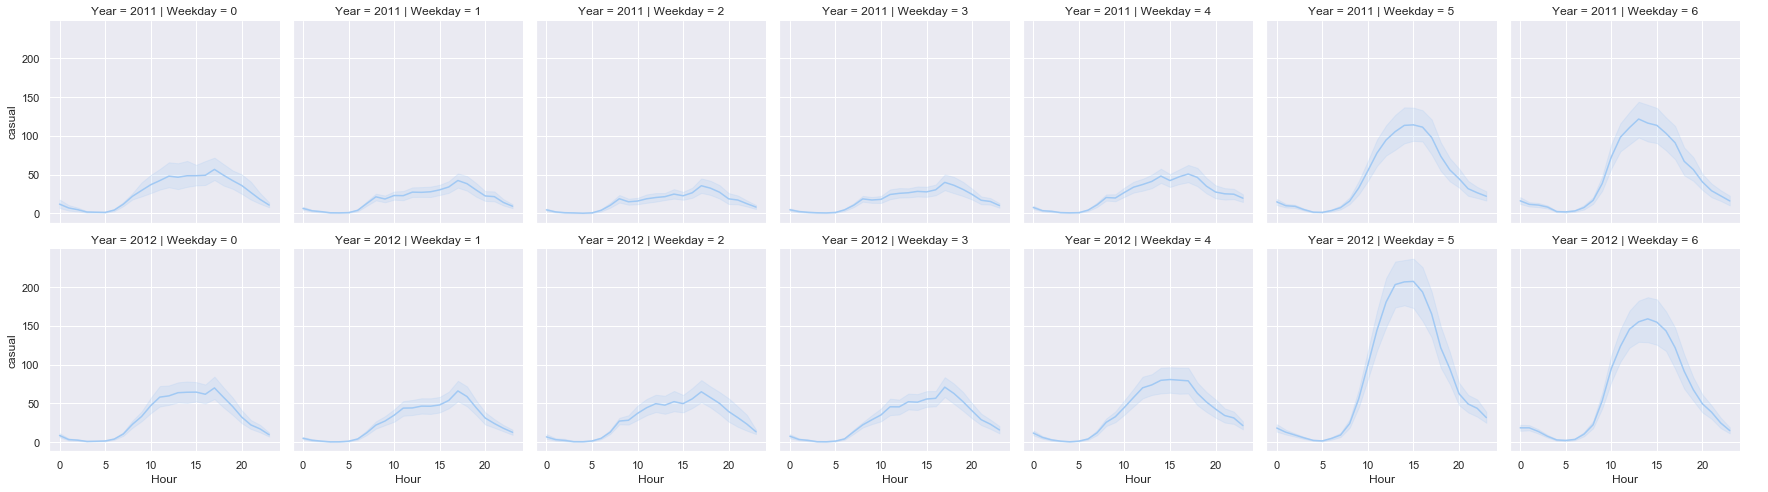

In [154]:
#Analyse des tendances journalières de la location de vélos par des non-abonnés et évolution entre 2011 et 2012
grid = sns.FacetGrid(df, col='Weekday',row='Year', size=3.5)
grid.map(sns.lineplot, 'Hour','casual')
grid.add_legend()

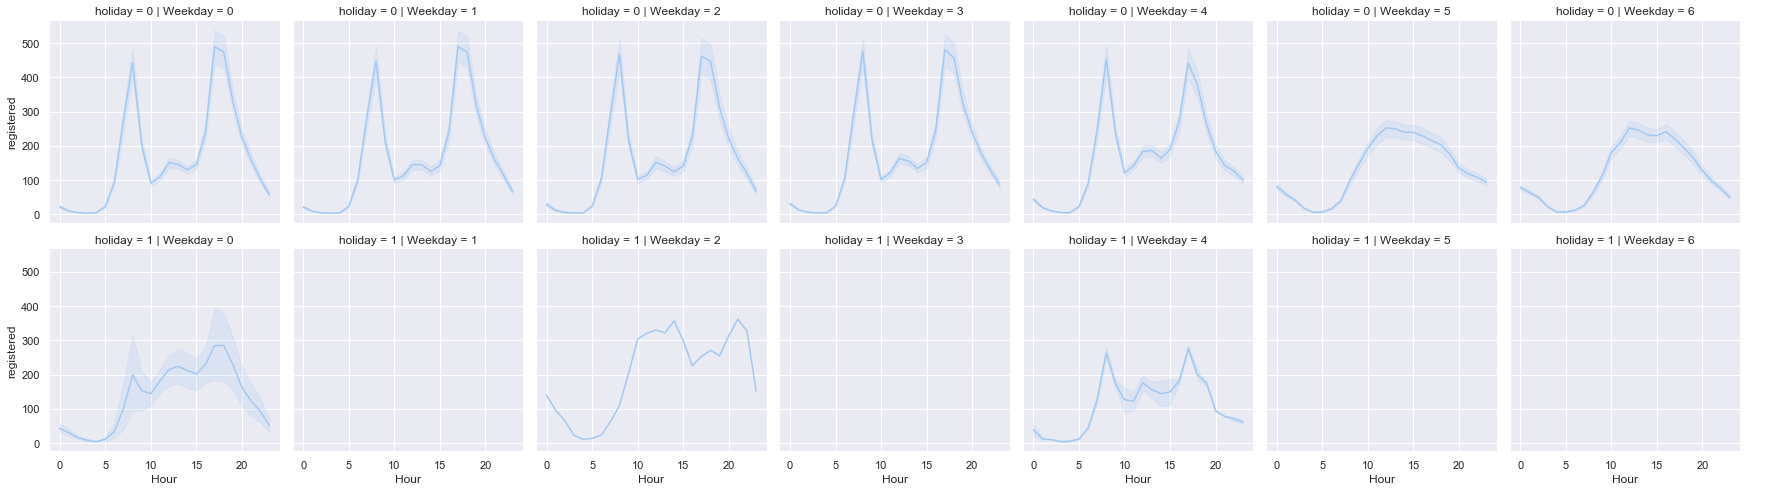

In [155]:
#Analyse des tendances journalières de la location de vélos en période standard
grid = sns.FacetGrid(df, col='Weekday',row='holiday', size=3.5)
grid.map(sns.lineplot, 'Hour','registered')
grid.add_legend()

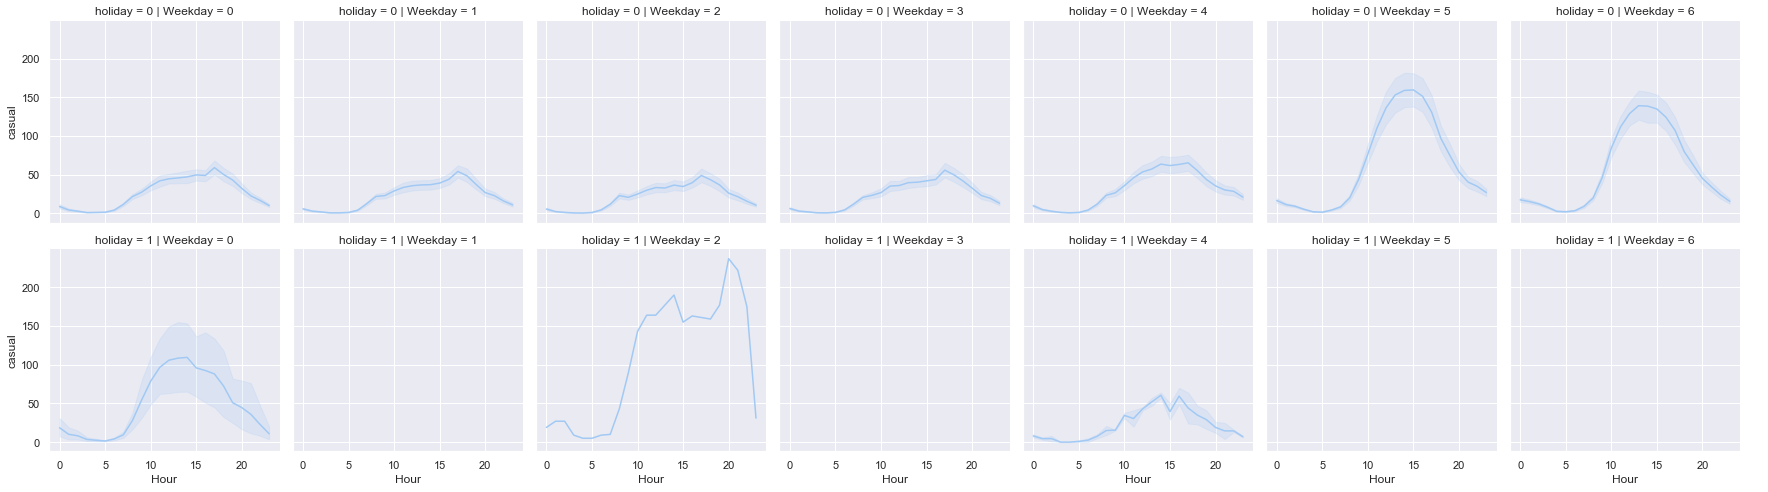

In [156]:
#Analyse des tendances journalières de la location de vélos en période de vacance
grid = sns.FacetGrid(df, col='Weekday',row='holiday', size=3.5)
grid.map(sns.lineplot, 'Hour','casual')
grid.add_legend()

#Sur ces graphes, on peut visualiser les habitudes d'utilisation des vélos en fonction du jour de la semaine. On observe des patterns réccurents de jour en jour qui varient drastiquement entre la semaine et le week-end et entre les périodes de vacance et les périodes standards. Par exemple en semaine, on observe un pic à 8h et à 18h. Le week-end la distribution est gaussienne avec une moyenne à midi. En periode de vacance, la distribution est plus flatte, avec une variance plus importante.


#Pour capter au mieux ces différentes tendances, nous allons créer trois variables polynomiales à partir de la colonne Hour pour isoler les différents patterns suivants: 

#Pattern1: Location par heure en semaine hors-vacance
#Pattern2: Location par heure en semaine en vacance
#Pattern3: Location par heure le week-end

#De plus, nous créerons une variable supplémentaire à partir de month (pattern4), comme la location varie également de manière polynomiale en fonction du mois de l'année.

#Nous allons travailler de manière unilatérale avec plusieurs target: count, registered et casual. Nous pourrons ainsi construire un modèle à partir de la variable count directement ou bien en additionnant les modèles registered & casual. Pour ce faire, nous considérerons les 3 datasets suivants:

In [157]:
df_count=df[["Hour","Weekday","holiday","weather","atemp","humidity","windspeed","Year","Month","count"]]
df_registered=df[["Hour","Weekday","holiday","weather","atemp","humidity","windspeed","Year","Month","registered"]]
df_casual=df[["Hour","Weekday","holiday","weather","atemp","humidity","windspeed","Year","Month","casual"]]

In [158]:
def Polynome_feature_adding (df,deg1,deg2,deg3,deg4):
    #Création de trois colonnes à partir de Hour, Weekday et Holiday
    df["Pattern1"]=df.apply(lambda x: x[0] if x[1]<5 and x[2]==0 else 0, axis=1)
    df["Pattern2"]=df.apply(lambda x: x[0] if x[1]<5 and x[2]==1 else 0, axis=1)
    df["Pattern3"]=df.apply(lambda x: x[0] if x[1]>4  else 0, axis=1)

    #Création des features polynomiales à partir des colonnes précedemment créees
    from sklearn.preprocessing import PolynomialFeatures
    poly1 = PolynomialFeatures(degree=deg1)
    poly2 = PolynomialFeatures(degree=deg2)
    poly3 = PolynomialFeatures(degree=deg3)
    poly4 = PolynomialFeatures(degree=deg4)

    #Juste une fonction qui permet de nommer les variables polynomiales à chaque ordre
    def get_col(feature,degré):
        cols=[]
        for i in range(degré+1):
            cols.append(feature+"_"+str(i))
        return cols
    
    Pattern1 = pd.DataFrame(poly1.fit_transform(df["Pattern1"].values.reshape(-1,1)), columns=get_col("Pattern1",deg1))
    Pattern2 = pd.DataFrame(poly2.fit_transform(df["Pattern2"].values.reshape(-1,1)), columns=get_col("Pattern2",deg2))
    Pattern3 = pd.DataFrame(poly3.fit_transform(df["Pattern3"].values.reshape(-1,1)), columns=get_col("Pattern3",deg3))
    Pattern4 = pd.DataFrame(poly4.fit_transform(df["Month"].astype("float").values.reshape(-1,1)), columns=get_col("Pattern4",deg4))
    
    #Retourne un dataset avec les variables polynomiales créees
    df = pd.concat([Pattern1, Pattern2, Pattern3, Pattern4, df.drop(columns=["Pattern1","Pattern2","Pattern3","Hour"], axis=1)], axis=1)
    return df, Pattern1, Pattern2, Pattern3

In [159]:
df_count, Pattern1_count, Pattern2_count, Pattern3_count=Polynome_feature_adding(df_count,9,9,9,6)
df_registered, Pattern1_r, Pattern2_r, Pattern3_r=Polynome_feature_adding(df_registered,9,9,9,6)
df_casual, Pattern1_c, Pattern2_c, Pattern3_c=Polynome_feature_adding(df_casual,12,12,12,6)

C:\Users\bigdata\DS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying 

In [160]:
#Dummyfication & shuffling.
def Dummify_sampling(dh):
    categorical_features = dh.columns[dh.dtypes == "category"].tolist()
    dh_dummies = pd.get_dummies(dh[categorical_features], drop_first=True).drop("weather_4",axis=1) #la catégorie weather.4 est nulle
    dh = pd.concat([dh_dummies,dh.drop(categorical_features, axis=1)], axis=1)
    np.random.seed(5)
    dh=dh.sample(frac=1)
    return dh

In [161]:
df_count=Dummify_sampling(df_count)
df_registered=Dummify_sampling(df_registered)
df_casual=Dummify_sampling(df_casual)

In [162]:
#Après avoir testé le modèle de ridge regression, qui underfit fortement (ce qui est logique compte tenu de la complexité des données)
#et le modèle de Knnregressor qui affiche des performances plutôt bonnes.
#J'ai choisi le DecisionTreeRegressor, qui donne la meilleure performance.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso, SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

def Model_building(df,target):
    y=df[target]
    X=df.iloc[:,:-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

    np.random.seed(5)
    Model = DecisionTreeRegressor(random_state=0)
    Model = Model.fit(X_train, y_train)

    ypred_train=Model.predict(X_train).reshape(-1,1)
    ypred_test=Model.predict(X_test).reshape(-1,1)
    r2_score_train=Model.score(X_train,y_train)
    return X_train, y_train, X_test, y_test, ypred_train, ypred_test


In [163]:
#Ici, nous allons afficher la performance du modèle count et du modèle registered+casual (entrainés séparemment)
X_train_count, y_train_count, X_test_count, y_test_count, ypred_train_count, ypred_test_count=Model_building(df_count, "count")
X_train_r, y_train_r, X_test_r, y_test_r, ypred_train_r, ypred_test_r=Model_building(df_registered, "registered")
X_train_c, y_train_c, X_test_c, y_test_c, ypred_train_c, ypred_test_c=Model_building(df_casual, "casual")

print("Modèle Count")
print("R2_score_train ",round(r2_score(y_train_count.values.reshape(-1,1),abs(ypred_train_count)),3))
print("R2_score_test ",round(r2_score(y_test_count.values.reshape(-1,1), abs(ypred_test_count)),3))
print("MAE_train ",round(mean_absolute_error(y_test_count.values.reshape(-1,1), abs(ypred_test_count)),3))
print("MAE_test ",round(mean_absolute_error(y_test_count.values.reshape(-1,1), abs(ypred_test_count)),3),"\n")

print("Modèle combiné: Registered+Casual")
print("R2_score_train ",round(r2_score(y_train_r.values.reshape(-1,1)+y_train_c.values.reshape(-1,1),abs(ypred_train_r+ypred_train_c)),3))
print("R2_score_test ",round(r2_score(y_test_r.values.reshape(-1,1)+y_test_c.values.reshape(-1,1), abs(ypred_test_r+ypred_test_c)),3))
print("MAE_train ",round(mean_absolute_error(y_test_r.values.reshape(-1,1)+y_test_c.values.reshape(-1,1), abs(ypred_test_r+ypred_test_c)),3))
print("MAE_test ",round(mean_absolute_error(y_test_r.values.reshape(-1,1)+y_test_c.values.reshape(-1,1), abs(ypred_test_r+ypred_test_c)),3))

#J'avais sorti le RMSLE pour comparer mon meilleur modèle avec Kaggle :) 
#J'atteri en 200ème position, tout en sachant que ce score n'est pas obtenu à partir du test set fourni par Kaggle, mais avec une partie du training set..
print("RMSLE_test",round(np.sqrt(mean_squared_log_error(y_test_r.values.reshape(-1,1)+y_test_c.values.reshape(-1,1), ypred_test_r+ypred_test_c )),3))


Modèle Count
R2_score_train  1.0
R2_score_test  0.913
MAE_train  33.756
MAE_test  33.756 

Modèle combiné: Registered+Casual
R2_score_train  1.0
R2_score_test  0.929
MAE_train  30.735
MAE_test  30.735
RMSLE_test 0.397


Comme nous nous y attendions, le DecisionTree regressor overfit. Le modèle qui additionne casual et registered se génerallise légèrement mieux avec un R2_score de 0.93 sur le test (ie:0.91 pour le modèle count)

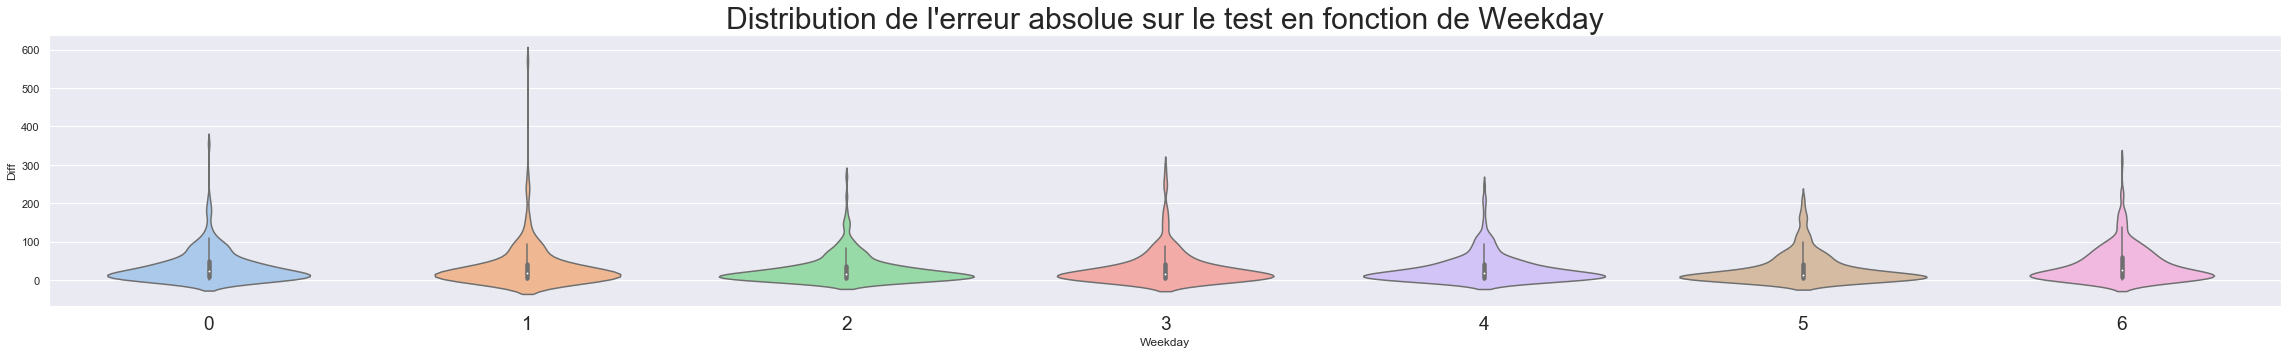

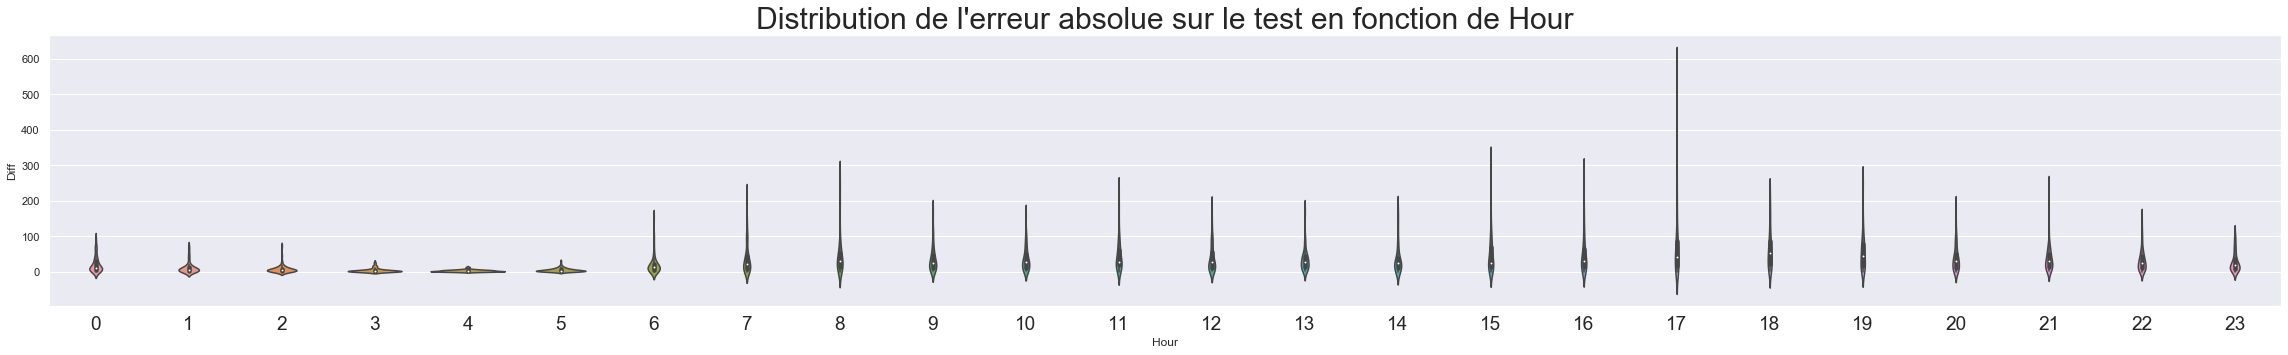

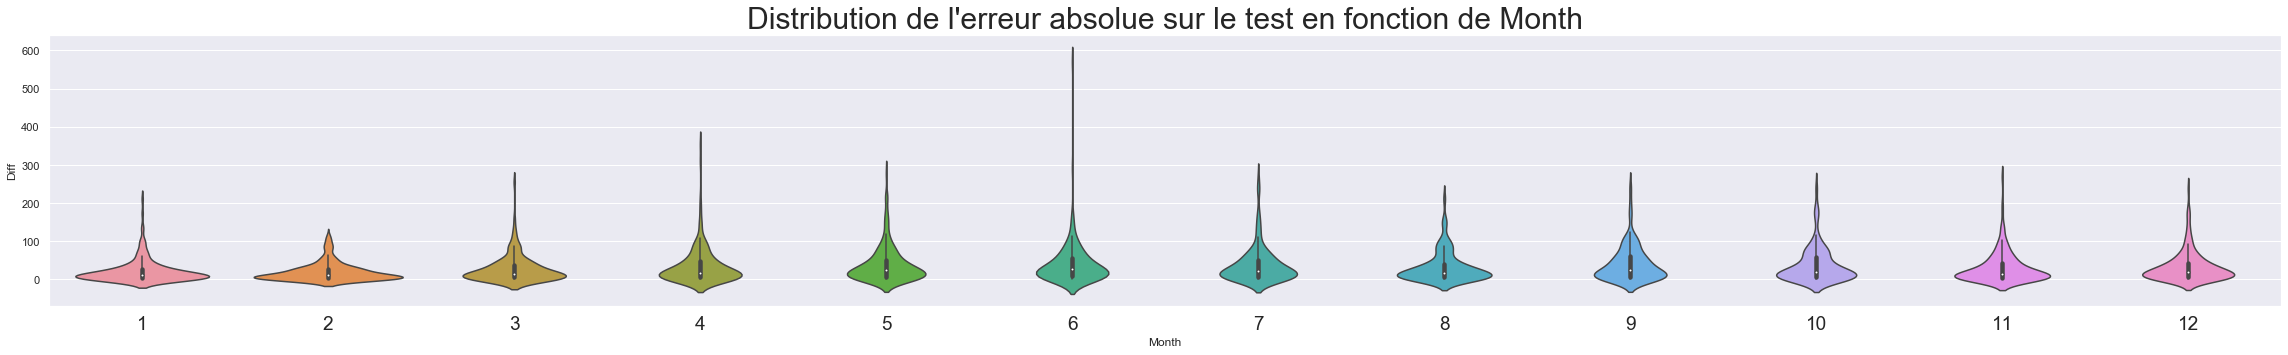

In [164]:
#Analyse de l'erreur du modèle count
result = pd.concat([y_test_count,pd.Series(np.round(ypred_test_count.flatten(),0),index=y_test_count.index,name="prediction")], axis=1)
result2=pd.merge(df, result, how='inner', left_index=True, right_index=True)
result2["Diff"]=abs(result2["count_x"]-result2["prediction"])
result2=result2.sort_values(["Diff"],ascending=False)

def violinplot(data,feature):
    plt.figure(figsize=(40,5))
    chart=sns.set(palette="pastel")
    sns.violinplot(data[feature],data["Diff"])
    plt.xticks(rotation='0', fontsize=19)
    plt.title("Distribution de l'erreur absolue sur le test en fonction de "+feature,fontsize=30)
    plt.show()
    
violinplot(result2,"Weekday")
violinplot(result2,"Hour")
violinplot(result2,"Month")

On observe que l'erreur est uniformément répartie sur les données temporelles, ce qui conforte nos choix faits sur la création de variable polynomiale. Le modèle apprends bien les différents patterns identifiés.

In [166]:
#Pour évaluer la pertinence des variables polynomiales créees, je me suis amusé à plotter les patterns appris 
#par un modèle de régression linéaire en reconstituant les polynomes avec les coefficients issu de l'entrainement. (Ici, on se préoccupe pas de splitter par train/test)
y=df_count["count"]
X=df_count.iloc[:,:-1]

ridge_regression = Ridge().fit(X, y)
coefficients=pd.Series(ridge_regression.coef_.flatten(), index=X.columns).sort_values()

#Ici, on retrieve les coefficients du polynome exclusivement, à chaque ordre:
coef_names_1=coefficients[Pattern1_count.columns.tolist()]
coef_names_2=coefficients[Pattern2_count.columns.tolist()]
coef_names_3=coefficients[Pattern3_count.columns.tolist()]

coef_names_1
#Remarque, on voit que l'on aurait pu s'arreter à l'ordre 6 pour capter l'essentiel des patterns.

C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.86186e-28): result may not be accurate.
  overwrite_a=True).T


Pattern1_0     0.000000
Pattern1_1    32.245816
Pattern1_2   -19.894092
Pattern1_3   -13.417534
Pattern1_4     8.756462
Pattern1_5    -1.742290
Pattern1_6     0.167031
Pattern1_7    -0.008468
Pattern1_8     0.000219
Pattern1_9    -0.000002
dtype: float64

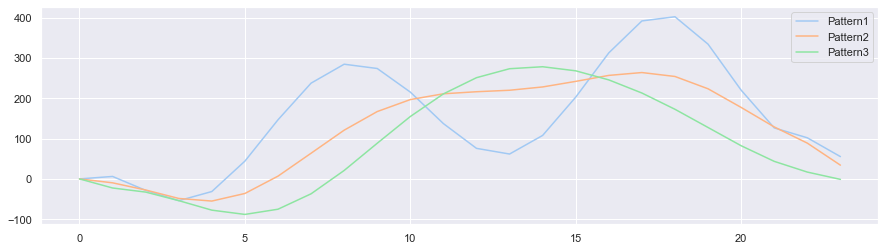

In [167]:
#Ensuite, on reconstitue le polynome avec les coefficients:
def polynome(x,coef):
        pol=0
        for i,ai in zip(range(len(coef)),coef.values):
            pol+=ai*x**i
        return pol

def plot_polynome (feature,coef_pol,label):   
    xx=np.arange(0,24,1).tolist()
    yy=list(map(lambda x:polynome(x,coef_pol),xx))
    plt.plot(xx,yy,label=label)
    plt.legend()

plt.figure(figsize=(15,4))
plot_polynome(Pattern1_count,coef_names_1,"Pattern1")
plot_polynome(Pattern2_count,coef_names_2,"Pattern2")
plot_polynome(Pattern3_count,coef_names_3,"Pattern3")

On observe que le modèle de régression a appris les différents patterns identifiés précedemment. On retrouve notamment un pic de location à 8h et à 18h en semaine (Pattern1). 

In [105]:
df.to_csv(r'C:\Users\bigdata\Desktop\Projet ML Nina\result.csv')